# ChatGpt_應用實務_合約審閱
## 實作讀取合約PDF檔,轉譯成合約文字內容並進行合約審閱
## 參考文件

### https://medium.com/@dr.booma19/extracting-text-from-pdf-files-using-ocr-a-step-by-step-guide-with-python-code-becf221529ef

### https://github.com/JaidedAI/EasyOCR

## 系統運作流程
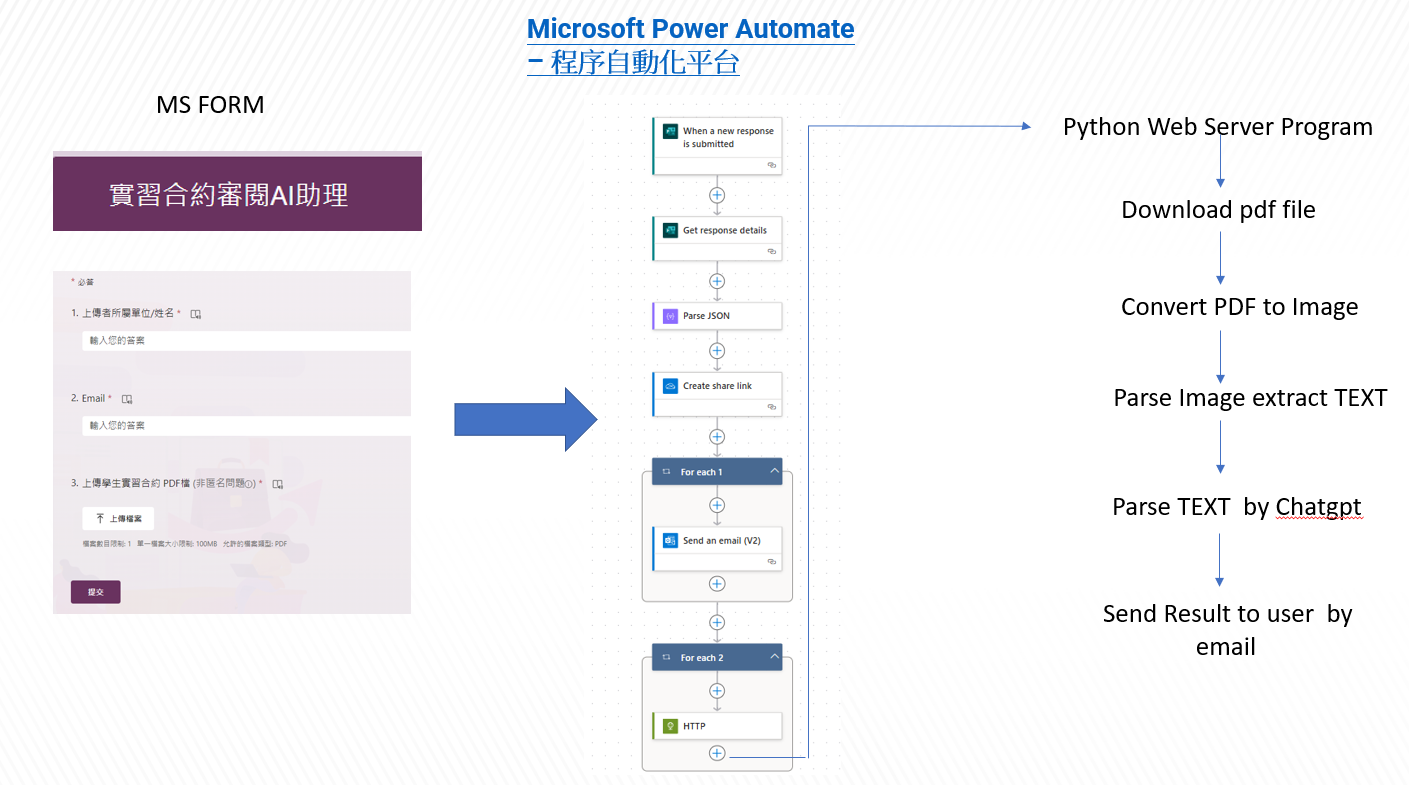

### Program 1:上傳合約PDF檔 WEB UI(本範例使用 ms form, no program code )

### 上傳合約PDF檔 WEB link
### https://forms.office.com/r/6a2n0kPi3b?origin=lprLink

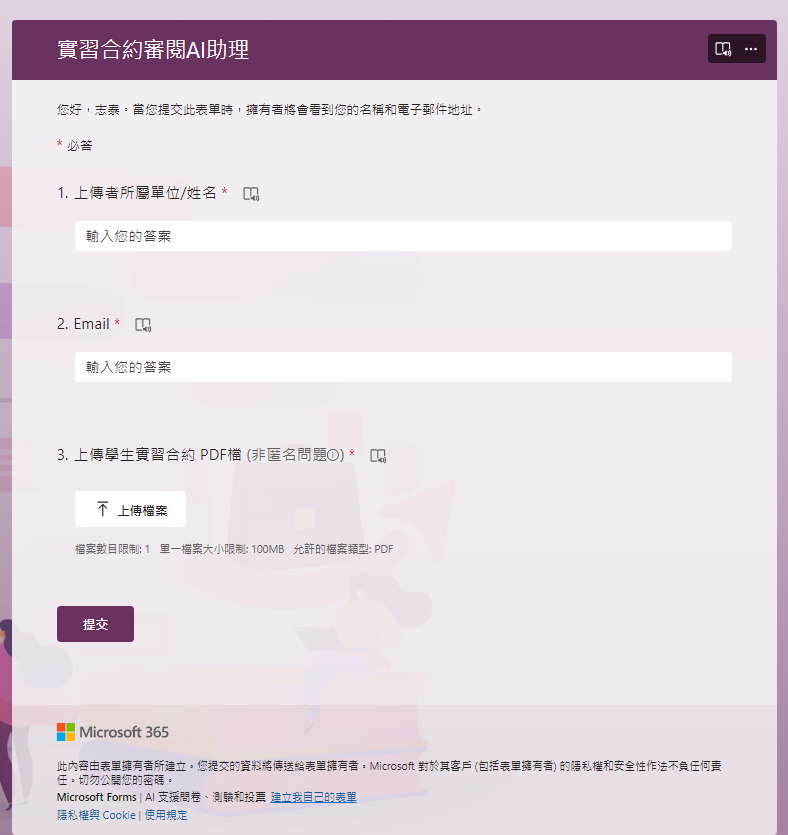

### Program 2:監聽合約PDF檔upload,並觸發合約PDF檔審閱工作(本範例使用 RPA:Power Automate, no program code )
### RPA:流程自動化機器人(https://www.automationanywhere.com/tw/rpa/robotic-process-automation)
### Power Automate:https://www.microsoft.com/zh-tw/power-platform/products/power-automate
### 透過RPA工具軟體,設計好工作流程後,機器人在後台自動運作
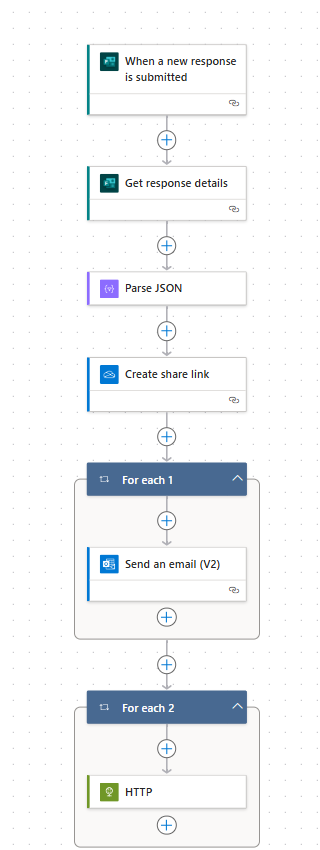

### Program 3:Python Web Server Api 程式
#### 收取檔案link,down load PDF file,呼叫ChatGPt api 執行合約審閱工作,並將結果 mail to user
#### (Web api server:flask,將pdf檔轉為image:pdf2image ,Image to TEXT:easyocr, send mail:smtplib )
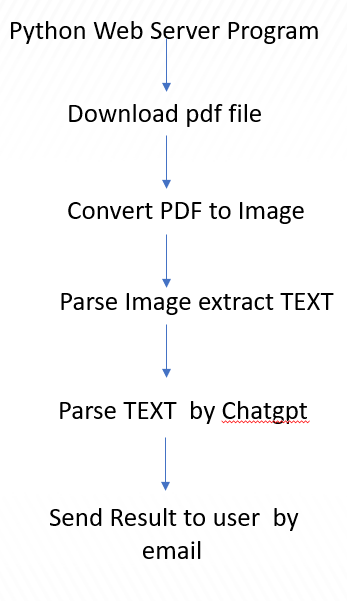

### 底下程式範例,只說明如何將pdf檔轉為image,Image to TEXT及Chatgpt 如何做合約審閱

###  Python 的pdf2image 第三方函式庫，可將 PDF 轉換為 PIL Image。
### 安裝 pdf2image 函式庫

In [1]:
!pip install pdf2image

Defaulting to user installation because normal site-packages is not writeable


### 安裝Poppler 
### Poppler is a PDF rendering library
### download poppler for Windows.
### https://github.com/oschwartz10612/poppler-windows/releases/
### 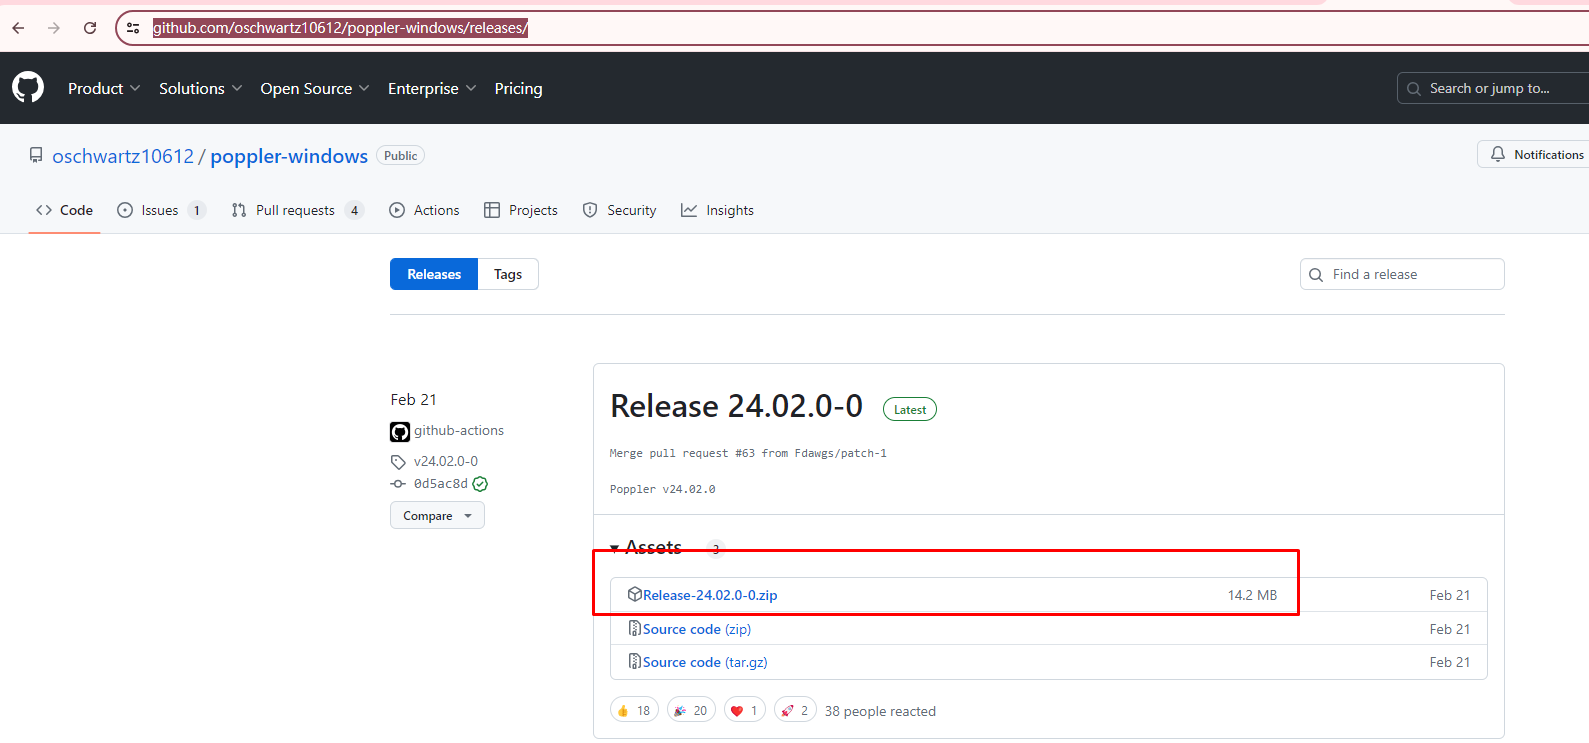
### You will then have to add the bin/ folder to PATH or use poppler_path = r"C:\path\to\poppler-xx\bin"

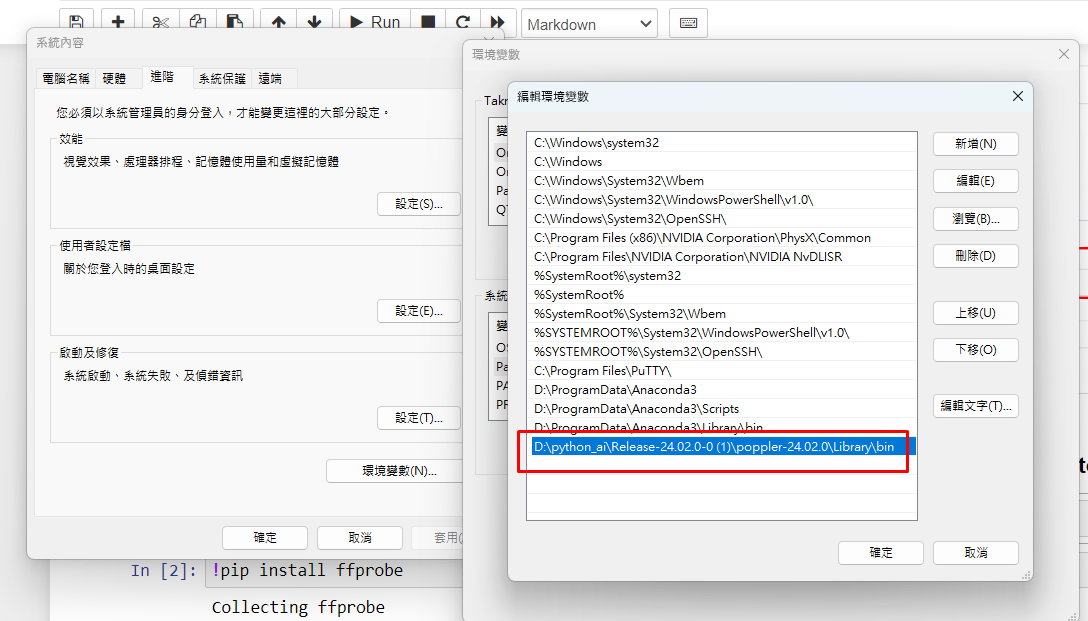

## Test pdf2image 將pdf檔轉為image

In [3]:
#pdf2image 將pdf檔轉為image
from pdf2image import convert_from_path

# Replace 'input_file.pdf' with the path to your PDF file
# use poppler_path = r"C:\path\to\poppler-xx\bin" as an argument in convert_from_path.
pdf_file = 'intentpdf.pdf'
extracted_text = []
pages = convert_from_path(pdf_file,poppler_path = r"D:\python_ai\poppler-24.02.0\Library\bin")
for i in range(len(pages)):
   
    pages[i].save('page'+ str(i) +'.jpg', 'JPEG')

### 每頁pdf 轉為一個 image file,有幾頁pdf 就產生幾個image file
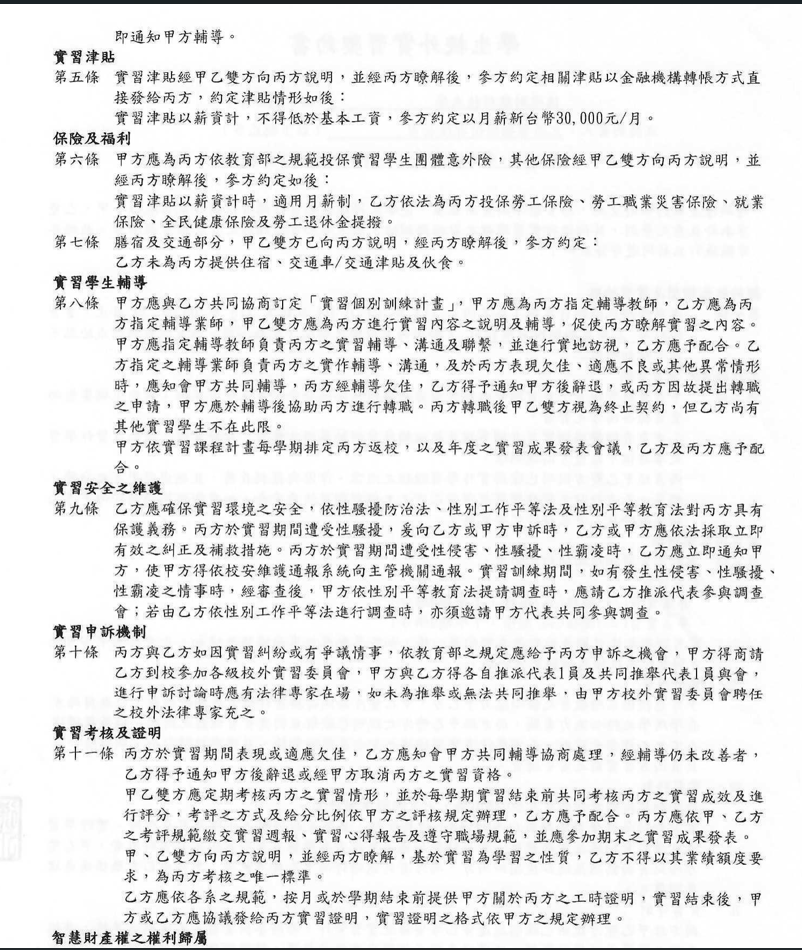

### 安裝  easyocr
#### Note 1: For Windows, please install torch and torchvision first by following the official instructions here https://pytorch.org. On the pytorch website, be sure to select the right CUDA version you have. If you intend to run on CPU mode only, select CUDA = None.

In [4]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00
     --------------------------------------- 38.8/38.8 MB 43.5 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 60.8 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 60.8 MB/s eta 0:00:00
     -------------------------------------- 35.0/35.0 MB 855.3 kB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 60.4 MB/s eta 0:00:00
     ---------------------------------------- 21.0/21.0 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 70.8/70.8 MB 1.7 MB/s eta 0:00:00
     --------------------------------------- 70.8/70.8 MB 17.2 MB/s eta 0:00:00
     --------------------------------------- 63.6/63.6 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 27.6 MB/s eta 0:00:00
     --------------------------------------- 63.

ERROR: Exception:
Traceback (most recent call last):
  File "d:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "d:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "d:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "d:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "d:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "d:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "d:\ProgramData\Anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "d:\ProgramData\Anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
soc

In [5]:
import easyocr
reader = easyocr.Reader(['ch_tra','en'], gpu=True) # this needs to run only once to load the model into memory
result = reader.readtext('page0.jpg', detail = 0, paragraph=True) # detail = 0, paragraph=True,簡單輸出 分段
print(result)

ModuleNotFoundError: No module named 'torch'

## 安裝 openai
### https://openai.com/chatgpt
### 要呼叫使用chatgpt api,要安裝 openai,並申請api key(使用chatgpt api 要付費)

In [6]:
!pip install --upgrade openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/a9/cc/f2bbce0ad52e09cd1aecb724af06385021b42a7317cd5938ba9c8581509d/openai-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ------- -------------------------------- 41.0/227.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ------------ --

## 安裝OpenCC
### https://github.com/BYVoid/OpenCC
### Open Chinese Convert (OpenCC, 開放中文轉換),中文簡繁轉換開源項目

In [8]:
!pip install opencc

  Obtaining dependency information for opencc from https://files.pythonhosted.org/packages/58/e0/9adbd3983da5bf627a097dbfb81acfa02d68e6e97b8be367968b88dde6f1/OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata
  Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata (12 kB)
Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl (716 kB)


### dotenv 套件:取得環境變數中的值

In [ ]:
!pip install python-dotenv

## 實習合約審閱 use easyocr and ChatGpt

In [ ]:
import cv2
import numpy as np
#pdf2image 將pdf檔轉為image
from pdf2image import convert_from_path
import easyocr

In [ ]:
from dotenv import load_dotenv
import os
import openai
#將呼叫chatgpt api 相關model的程式另寫在aimodels.py
from src.models import OpenAIModel
from src.memory import Memory
from src.logger import logger

In [ ]:
#OPENAI_API key 不要直接填寫在程式碼內,openai 可能因資安問題不執行chatgpt api呼叫
#請將相關參數放在檔案中,如使用環境設定檔: .env
# .env file 內容
#OPENAI_API =" put your api key value"
#OPENAI_MODEL_ENGINE = 'gpt-3.5-turbo'
#SYSTEM_MESSAGE = 'You are a helpful assistant.'
#
#load_dotenv 讀入環境設定檔
load_dotenv('.env')
#設定openai 的 api_key 
openai.api_key = os.getenv('OPENAI_API')
#
my_secret = os.getenv('OPENAI_API')
model = OpenAIModel(api_key=my_secret)
#

In [ ]:
def extract_text_from_image(image):
    text = reader.readtext(image, detail = 0, paragraph=True)
    return text

In [ ]:
# Replace 'input_file.pdf' with the path to your PDF file
# use poppler_path = r"C:\path\to\poppler-xx\bin" as an argument in convert_from_path.
pdf_file = 'intent2.pdf'
extracted_text = []
reader = easyocr.Reader(['ch_tra','en']) # this needs to run only once to load the model into memory
pages = convert_from_path(pdf_file,poppler_path = r"D:\python_ai\poppler-24.02.0\Library\bin")
for i in range(len(pages)):
    #pages[i].save('page'+ str(i) +'.jpg', 'JPEG')
    # Step 2: Preprocess the image (deskew)
    #preprocessed_image = deskew(np.array(pages[i]))
    
    # Step 3: Extract text using OCR
    text = extract_text_from_image(np.array(pages[i]))
    extracted_text.append(text)
    #

In [ ]:
strall=""
for itext in extracted_text:
    stri=""
    for itxt in itext:
        stri=stri+"\n"+itxt
    strall=strall+stri    
print(strall)    

In [ ]:
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為學生企業實習合約內容,請針對提示以繁體中文來回覆審閱結果告知合約正常或有問題,若覺得有問題請找出實習合約中的潛在問題或風險：1.立契約書人：合約是否有甲方,乙方,丙方三方立契約書人？2.實習期間與地點：合約是否清楚明確說明實習期間與地點？3.工作職掌及學習守則：合約是否清楚說明三方工作職掌與實習學習守則？4.實習內容與時數：合約是否清楚說明實習內容與至少648小時的實習時數？5.實習津貼及保險與福利：合約是否清楚說明實習津貼及保險與福利？6.實習報到及輔導與安全維護：合約是否清楚說明實習報到及輔導與安全維護？7.法律責任澄清：合約是否清楚明確地界定了雙方的法律責任？是否有模糊或含糊不清的條款可能導致爭議？8.隱私權保護：合約是否包含保護個人資料和隱私的條款？這些條款是否充分保護隱私權？9.機密性和知識產權：合約中是否明確規定了對於機密信息的保密責任？實習期間創造的任何知識產權歸屬情況？10.工作條件和安全：合約中是否提及了工作條件和工作環境的安全？是否有關於工時、加班或安全措施的相關規定？11.終止條款：是否有關於提前終止合約的條款？這些條款是否合理且公平？12.評估潛在風險：是否有任何可能導致潛在法律風險或不利後果的條款？這些風險是否可以減輕或避免？13.爭議解決機制：合約中是否包含了解決爭議的機制？這些機制是否公平且有效？" + strall+ "\n A:"
              
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4-1106-preview')   
if error_message:
          print(error_message)    
else:
          print(response)
#摘要
#f3 = open(filename+"3.txt", "w",encoding="utf-8")
#f3.write(response)
#f3.close()   